In [45]:
import cv2
import matplotlib.pyplot as plt


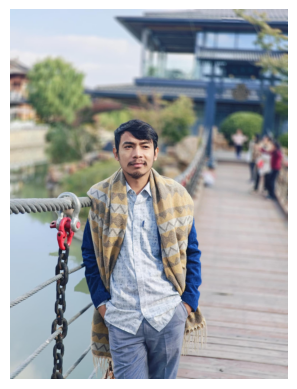

In [57]:
# Load the image
img_path = 'binesh.jpg'  # Replace with your image file path
img = cv2.imread(img_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()


In [58]:
import cv2

# Load the Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


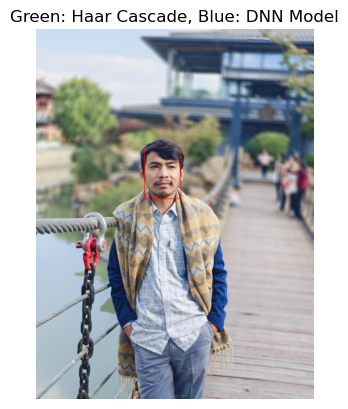

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = 'binesh.jpg'  # Replace with your image file path
img = cv2.imread(img_path)

if img is None:
    print("Error: Unable to load image. Check the file path.")
else:
    # Convert the image to RGB and grayscale
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ===== Haar Cascade Detection =====
    # Load Haar Cascade Classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces with stricter parameters
    haar_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))

    # # Filter boxes based on size
    # filtered_faces = [(x, y, w, h) for (x, y, w, h) in haar_faces if 50 < w < 200 and 50 < h < 200]

    # # Draw rectangles around Haar-detected faces
    # for (x, y, w, h) in filtered_faces:
    #     cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green for Haar

    # ===== Deep Learning Detection =====
    # Provide paths to the downloaded files
    proto_path = r'C:\Users\BineshMahato\python\ml_p\face_detectation\deploy.prototxt'
    model_path = r'C:\Users\BineshMahato\python\ml_p\face_detectation\res10_300x300_ssd_iter_140000.caffemodel'

    
   # Load pre-trained DNN model (Caffe-based)
    dnn_net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

    # Prepare the image for the DNN model
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104.0, 177.0, 123.0))
    dnn_net.setInput(blob)

    # Perform detection
    dnn_detections = dnn_net.forward()

    h, w = img.shape[:2]  # Get image dimensions
    for i in range(dnn_detections.shape[2]):
        confidence = dnn_detections[0, 0, i, 2]
        if confidence > 0.5:  # Confidence threshold
            box = dnn_detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue for DNN

    # Display the results
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.title("Green: Haar Cascade, Blue: DNN Model")
    plt.show()


In [60]:
# Save the output image
output_path = 'output_image_with_faces.jpg'
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))  # Convert back to BGR before saving


True